<a href="https://colab.research.google.com/github/jcastiblanco/-Fundamentos-de-IA-y-Machine-Learning/blob/main/InsuranceAnalysis_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Medical Cost Personal Datasets***
***Insurance Forecast by using Linear Regression***

About Dataset
## **Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

## ***Columns***

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## ***Acknowledgements***
The dataset is available on GitHub here.

## ***Inspiration***
**Puede predecir el costo asociado a gastos medicos?**

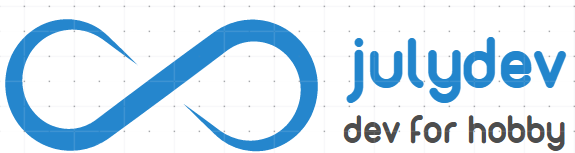

# **Ejercicio de la semana 2**



*   Importación de librerias de trabajo



In [48]:
#Importa Librerias
import pandas as pd


*   Linea para conectarse al drive de google



In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   Importación del archivo en el dataframe

In [50]:
#Carga el archivo en memoria
df_insurance=pd.read_csv("/content/drive/MyDrive/maestria2023/modulo1/machineLearningAI/week1/insurance.csv")


In [51]:
#Exploración Inicial del dataset que ahora es un dataframe
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
#Valida las primeras filas del archivo
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Validar ultimas filas del archivo

In [53]:
df_insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


*   Validación de tipos de datos

In [54]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object



*   Validación de las estadísticas descriptivas básicas. Nos permiten validar información relevante como:
  *   Edad mínima de la muestra 18 años, edad máxima 64.
  *   Tan solo el 25% de la población es menor o igual a 27 años, el 50% entre los 39 y el 75% de la población es menor de 51 años.
  *  Solo hay dos tipos de sexo. Masuclino y femenino.
  *  4 regiones categoricas
  * dos posibles valores en definición si es fumador.
  * El valor mínimo de seguro son USD $ 1121 $  y el máximo USD $ 63770 $ 
  * La variable dependiente es "Charges". Definida por las otras 6 columnas.



In [55]:
#Recibimos las estadísticas básicas de los campos numéricos en el df
df_insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


*  El conjunto de datos está compuesto por 1338 muestras, 6 variables independienes y una dependiente.  Al ser un proceso contínuo una regresión lineal es el mejor método de predicción de valores.

In [56]:
#Tamaño de la matriz número de filas y variables
df_insurance.shape

(1338, 7)

* Todas las columnas tienen información, el grado de completitud de información es del **100%**

In [57]:
#cuenta el número de muestras nulas para cada una de las columnas
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*  Listado de columnas

In [58]:
#validar Nombre de columnas
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

* Listado de columnas con sus tipos de datos

In [59]:
#validar tipos de datos de cada columna
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Análisis gráfico de las variables
* Importación de librerías gráficas

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


* Visualización de variables:
  * Al validar la edad vs el costo, podemos ver que existen algunos "outliers" es decir, personas que pagan mucho más pero que no necesariamente siguen una función homogénea.
  * Esta gráfica también nos permite ver como el valor de los costos médicos aumenta con los años.

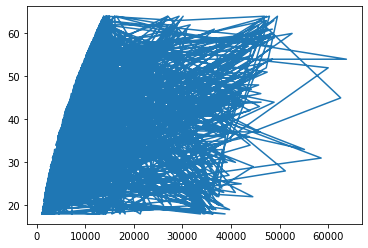

In [61]:
plt.plot(df_insurance.charges,df_insurance.age)

*  Distribución histograma de variables categoricas

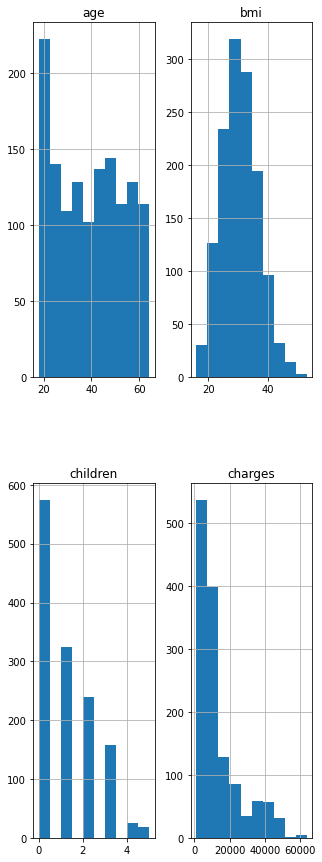

In [62]:
df_insurance.hist(figsize=(5,15))
plt.show()

* Distribución detalla de la prima de seguro  

Text(0.5, 1.0, 'Distribución de cargos de seguros')

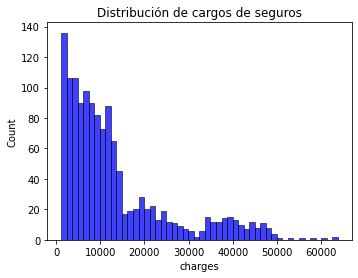

In [63]:
#Visualización distribución variable charge
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.histplot(df_insurance['charges'],bins=50,color='b',ax=ax)
ax.set_title("Distribución de cargos de seguros")

* distribución de la masa  por edad y bmi y la relación con su forma de fumar
  * Como se aprecia en la gráfica de la izquierda se evidencian 3 grupos, el primero donde claramente los fumadores pagan más prima de seguro y con los años hay una ligera pendiente a aumentar la prima de seguro, un segundo grupo que incluye personas fumadoras y no fumadores que tienen, que tienen una cuota promedio y un último grupo donde se sitúan los que no fuman.  Donde la edad no es tan determinante.  Con lo cuál se deduce que el factor de ser fumador si es relevante al momento de calcular la prima de seguro.
  * En la segunda gráfica se observa que el índice de masa corporal no necesariamente tiene un impacto alto en la prima de seguro.

Text(0.5, 1.0, 'Scatter plot - Carger vs bmi')

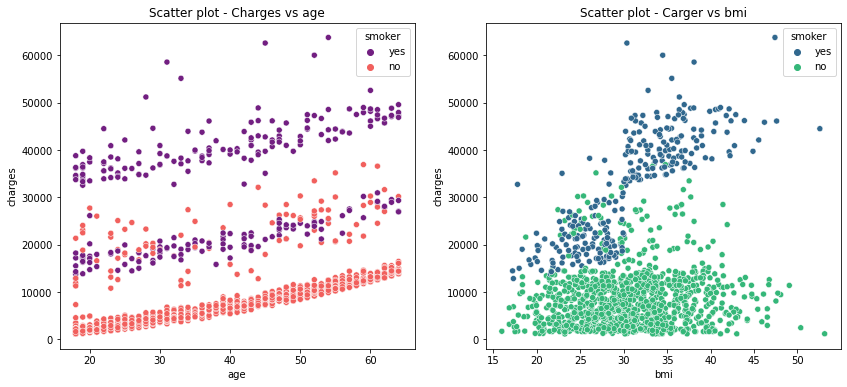

In [64]:
# uso de scatterplot
f =  plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot (x='age', y ='charges', data=df_insurance, palette='magma', hue='smoker',ax=ax)
ax.set_title("Scatter plot - Charges vs age")

ax=f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df_insurance,palette='viridis',hue='smoker')
ax.set_title("Scatter plot - Carger vs bmi")


* Análisis de correlación de variables:  Este análisis nos permite eliminar las variables que estén altamente correlacionadas con el valor a predecir. Esto se utiliza para descartar variables que tengan el mismo comportamiento a la variable a predecir y que podrían obligar al modelo a utilizar solo esta variable para el cálculo. Un ejemplo podría ser que el dataset tuviese una variable de si las personas tienen enfermedades degenerativas.  Lo cual está altamente correlacionado con el precio a pagar de la prima de seguro. Entre más cerca estén las variables a 1.  Serán más correlativas.

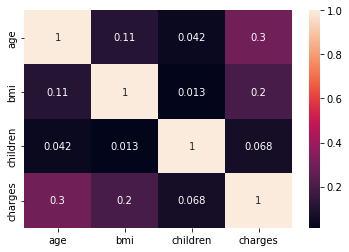

In [65]:
#Análisis de correlación
corr=df_insurance.corr()
sns.heatmap(corr, annot= True);

# Fase de Entrenamiento

* Es bueno plantear diferentes hipótesis y ver cual de ellas nos da mejor resultados.

## Preparar el dataset para dejar solo Variables numéricas
* Crear un vectos con las variables categoricas
* Crear un dataset con solo variables numéricas

In [66]:
from pandas.core.arrays import categorical
# Hipotesis 1
categorical_columns=["sex","children","smoker","region"]
insurance_data_hipo1 = df_insurance.drop(categorical_columns, axis = 1)

In [67]:
insurance_data_hipo1.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


* Ahora vamos a predecir el precio de la prima

In [68]:
x_hipt1 = insurance_data_hipo1.drop('charges',axis=1)
y_hipt1 = insurance_data_hipo1['charges']

* A continuación dividimos el dataset en dos grupos el 20% para entrenamiento y el 80% para pruebas del modelo

In [69]:
from sklearn.model_selection import train_test_split
x_hipt1_train, x_hipt1_test,y_hipt1_train, y_hipt1_test = train_test_split(x_hipt1,y_hipt1, test_size=0.20, random_state=42)

* Una vez tenemos nuestros conjuntos de datos, ahora podemos utilizar la librería de regresión lineal.

In [70]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipt1_train,y_hipt1_train)

LinearRegression()

* Ahora que el modelo está entrenado, vamos a la fase de validación

## **Fase de Validación**

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
# predecimos los valores y para los datos usamos en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipt1_train)
# calculamos el Error Cuadrático Medio (MSE)
mse_hipt1_train = mean_squared_error(y_true= y_hipt1_train, y_pred= prediccion_entrenamiento)
print ('Error cuadrático medio (MSE) =' + str(mse_hipt1_train))
#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipt1_test)

#calculamos el error cuadrático medio
mse_hipt1_test = mean_squared_error(y_true= y_hipt1_test, y_pred= prediccion_entrenamiento)
print ('Error cuadrático medio (MSE) =' + str(mse_hipt1_test))

Error cuadrático medio (MSE) =128941462.98397976
Error cuadrático medio (MSE) =131440262.76073726


* Conclusiones:  Esta primera hipótesis no es correcta. El error debe ser cercano a cero (0).

## Hipótesis 2
* Vamos utilizar one hotten coding para volver las variables categóricas a numéricas

In [73]:
insurance_data_hipo2 = pd.get_dummies(data = df_insurance, prefix='OHE', prefix_sep='_',
                                      columns = categorical_columns,
                                      drop_first=True,
                                      dtype='int8')

In [74]:
insurance_data_hipo2

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


* Ahora que hemos creado las variables dummies, es tiempo de haer un nuevo conjunto de datos de prueba y entrenamiento.

In [75]:
x_hipt2= insurance_data_hipo2.drop('charges',axis=1)
y_hipt2= insurance_data_hipo2['charges']
from sklearn.model_selection import train_test_split
x_hipt2_train, x_hipt2_test,y_hipt2_train,y_hipt2_test = train_test_split(x_hipt2, y_hipt2, test_size=0.20, random_state=43)

## Fase Validación Hipótesis 2
*  Hacer un entrenamiento sobre el train y uno sobre el test
*  Validamos el MSE en ambos modelos

In [76]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipt2_train,y_hipt2_train)

LinearRegression()

In [77]:

# predecimos los valores y para los datos usamos en el entrenamiento
prediccion_entrenamiento2 = regresion_lineal.predict(x_hipt2_train)
# calculamos el Error Cuadrático Medio (MSE)
mse_hipt2_train = mean_squared_error(y_true= y_hipt2_train, y_pred= prediccion_entrenamiento2)
print ('Entrenamiento - Error cuadrático medio (MSE) Hipo1 =' + str(mse_hipt1_train))
print ('Entrenamiento - Error cuadrático medio (MSE) Hipo2 =' + str(mse_hipt2_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento2 = regresion_lineal.predict(x_hipt2_test)

#calculamos el error cuadrático medio
mse_hipt2_test = mean_squared_error(y_true= y_hipt2_test, y_pred= prediccion_entrenamiento2)
print ('Test - Error cuadrático medio (MSE) Hipo1 =' + str(mse_hipt1_test))
print ('Test - Error cuadrático medio (MSE) Hipo2 =' + str(mse_hipt2_test))

Entrenamiento - Error cuadrático medio (MSE) Hipo1 =128941462.98397976
Entrenamiento - Error cuadrático medio (MSE) Hipo2 =34753333.941468336
Test - Error cuadrático medio (MSE) Hipo1 =131440262.76073726
Test - Error cuadrático medio (MSE) Hipo2 =43379952.19655211


## Hipótesis 3

* Ahora Normalizaremos las variables objetivo

In [78]:
insurance_data_hipo3 = pd.get_dummies(data = df_insurance, prefix = 'OHE', prefix_sep='_',
                                      columns = categorical_columns,
                                      drop_first = True,
                                      dtype = 'int8')

In [84]:
x_hipt3 = insurance_data_hipo3.drop('charges', axis=1)
y_hipt3 = insurance_data_hipo3['charges']

In [85]:
#Escalamos la variable charges para hacerla más estándar
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

y_hipo3=scaler.fit_transform(y_hipt3.to_numpy().reshape(-1,1))
y_hipo3=y_hipo3.reshape(1,-1)[0]

In [87]:
x_hipt3_train,x_hipt3_test,y_hipt3_train,y_hipt3_test = train_test_split(x_hipt3, y_hipo3, test_size=0.20, random_state=43)

In [88]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_hipt3_train,y_hipt3_train)

LinearRegression()

In [89]:
# predecimos los valores y para los datos usamos en el entrenamiento
prediccion_entrenamiento3 = regresion_lineal.predict(x_hipt3_train)
# calculamos el Error Cuadrático Medio (MSE)
mse_hipt3_train = mean_squared_error(y_true= y_hipt3_train, y_pred= prediccion_entrenamiento3)
print ('Entrenamiento - Error cuadrático medio (MSE) Hipo1 =' + str(mse_hipt1_train))
print ('Entrenamiento - Error cuadrático medio (MSE) Hipo2 =' + str(mse_hipt2_train))
print ('Entrenamiento - Error cuadrático medio (MSE) Hipo3 =' + str(mse_hipt3_train))
#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento3 = regresion_lineal.predict(x_hipt3_test)

#calculamos el error cuadrático medio
mse_hipt3_test = mean_squared_error(y_true= y_hipt3_test, y_pred= prediccion_entrenamiento3)
print ('Test - Error cuadrático medio (MSE) Hipo1 =' + str(mse_hipt1_test))
print ('Test - Error cuadrático medio (MSE) Hipo2 =' + str(mse_hipt2_test))
print ('Test - Error cuadrático medio (MSE) Hipo3 =' + str(mse_hipt3_test))

Entrenamiento - Error cuadrático medio (MSE) Hipo1 =128941462.98397976
Entrenamiento - Error cuadrático medio (MSE) Hipo2 =34753333.941468336
Entrenamiento - Error cuadrático medio (MSE) Hipo3 =0.23715489186563485
Test - Error cuadrático medio (MSE) Hipo1 =131440262.76073726
Test - Error cuadrático medio (MSE) Hipo2 =43379952.19655211
Test - Error cuadrático medio (MSE) Hipo3 =0.29602247340172916
